#  Petroleum Customer Clustering Project — Sicah Energies LTD

## 1. Business Understanding

Sicah Energies LTD is a petroleum products dealer that serves a diverse range of customers — from individual motorists and small businesses to large commercial clients. Each customer segment demonstrates unique purchasing behaviors such as fueling frequency, preferred fuel type, payment methods, and spending levels.

In an increasingly competitive petroleum market, understanding customer behavior is essential for maintaining loyalty and improving profitability. Applying uniform marketing, pricing, and loyalty strategies across all customers often leads to inefficiencies and lost opportunities.

This project seeks to **analyze and segment Sicah Energies LTD’s customers** based on their purchasing and behavioral characteristics. Through data-driven insights, the company aims to enhance its marketing strategies, strengthen customer relationships, and improve overall business performance.


## 2. Problem Statement

Sicah Energies LTD currently lacks a clear understanding of the various customer groups it serves. Without data-driven segmentation, all customers are treated uniformly when designing loyalty programs, promotional campaigns, and service packages.

This generalized approach has led to:
- Missed opportunities for targeted marketing,
- Inefficient allocation of marketing resources,
- Poor understanding of customer churn risks and demand variations.

To address this challenge, this project will apply **unsupervised machine learning (clustering)** to group customers with similar characteristics and purchasing patterns. These insights will enable the company to design tailored marketing initiatives, improve loyalty programs, and optimize operational decisions.


## 4. Success Criteria

The success of this project will be evaluated based on the following:

- The clustering model should identify **distinct and interpretable customer groups**.  
- Each identified cluster should display clear differences in behavior, such as spending habits, frequency of visits, or fuel type preferences.  
- The insights generated should support **data-driven decision-making** at Sicah Energies LTD, enabling personalized marketing, customer retention, and increased profitability.


## 5. Dataset Description

The dataset used in this analysis contains anonymized customer records provided by **Sicah Energies LTD**.  
Each record represents a unique customer and captures both behavioral and demographic information.

| Column | Description |
|---------|-------------|
| `customer_id` | Unique identifier for each customer |
| `station_id` | The station where the customer primarily transacts |
| `avg_monthly_litres` | Average fuel volume purchased per month |
| `avg_monthly_spend` | Total amount spent per month (in local currency) |
| `visits_per_month` | Average number of fueling visits per month |
| `preferred_fuel` | Type of fuel mostly purchased (Petrol, Diesel, or Kerosene) |
| `payment_method` | Primary payment mode (Mpesa, Cash, or Credit) |
| `location_type` | Indicates whether the customer is based in an Urban or Rural area |
| `loyalty_score` | Loyalty metric ranging from 0 to 100, representing customer engagement |

This dataset will form the foundation for the **clustering analysis**, enabling the identification of patterns and groupings within Sicah Energies LTD’s customer base.


# 6. Data Understanding

In this phase, we explore the structure and content of Sicah Energies LTD’s customer dataset to gain a deeper understanding of the variables available for analysis.

This includes:
- Loading the dataset into a pandas DataFrame  
- Inspecting the first few records  
- Reviewing data types and basic statistics  
- Identifying missing or inconsistent values  
- Understanding categorical feature distributions  

A clear understanding of the data ensures that we prepare it appropriately for clustering and derive reliable insights.


# 7. Load and Inspect Dataset

In [2]:
# Import required libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Data\petroleum_customers.csv")

# Display the first 5 records
df.head()


,customer_id,station_id,avg_monthly_litres,avg_monthly_spend,visits_per_month,preferred_fuel,payment_method,location_type,loyalty_score
0,C001,107,813,149738.16,8,Petrol,Cash,Rural,60
1,C002,104,444,78369.02,6,Petrol,Mpesa,Urban,46
2,C003,108,518,83554.63,5,Diesel,Mpesa,Urban,83
3,C004,105,410,73387.76,8,Petrol,Cash,Urban,91
4,C005,107,277,52226.16,4,Diesel,Credit,Urban,61


# 8. Explore Dataset structure

In [3]:
# Check dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Display column names and data types
df.info()

# Quick overview of numerical statistics
df.describe().T


Dataset contains 500 rows and 9 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         500 non-null    object 
 1   station_id          500 non-null    int64  
 2   avg_monthly_litres  500 non-null    int64  
 3   avg_monthly_spend   500 non-null    float64
 4   visits_per_month    500 non-null    int64  
 5   preferred_fuel      500 non-null    object 
 6   payment_method      500 non-null    object 
 7   location_type       500 non-null    object 
 8   loyalty_score       500 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 35.3+ KB


,count,mean,std,min,25%,50%,75%,max
station_id,500.0,105.43000,2.941156,101.00,103.0000,105.00,108.0000,110.0
avg_monthly_litres,500.0,491.88400,239.754497,56.00,320.0000,449.00,623.0000,1335.0
avg_monthly_spend,500.0,86120.78778,42365.203622,9830.37,55453.1075,78524.88,110700.6875,230185.9
visits_per_month,500.0,7.57400,2.892275,1.00,6.0000,8.00,10.0000,17.0
loyalty_score,500.0,64.21000,19.728871,30.00,47.0000,65.00,81.0000,99.0


In [4]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


# Categorical Variable Distribution

In [5]:
# Display unique values and counts for categorical features
categorical_cols = ["preferred_fuel", "payment_method", "location_type"]

for col in categorical_cols:
    print(f"\n--- {col.upper()} ---")
    print(df[col].value_counts(normalize=True) * 100)



--- PREFERRED_FUEL ---
preferred_fuel
Petrol      54.6
Diesel      34.6
Kerosene    10.8
Name: proportion, dtype: float64

--- PAYMENT_METHOD ---
payment_method
Mpesa     50.4
Cash      30.2
Credit    19.4
Name: proportion, dtype: float64

--- LOCATION_TYPE ---
location_type
Urban    72.4
Rural    27.6
Name: proportion, dtype: float64


# 11: Numerical Feature Distributions

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

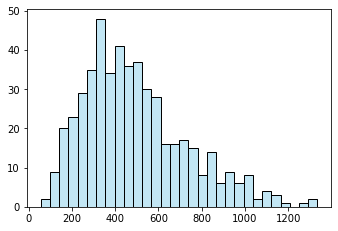

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of key numerical variables
num_cols = ["avg_monthly_litres", "avg_monthly_spend", "visits_per_month", "loyalty_score"]

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()
